In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# for the following we will use X = [-1,1] and mu = uniform

# def intg(x):
#   return -x**2/2
# def g(x):
#   return -x
# def gprime(x):
#   return -1

# def intg(x):
#   return x**2/2
# def g(x):
#   return x
# def gprime(x):
#   return 1

# def intg(x):
#   return x**4/4
# def g(x):
#   return x**3
# def gprime(x):
#   return 3*(x**2)

# def intg(x):
#   return x**3/3
# def g(x):
#   return x**2
# def gprime(x):
#   return 2*x

# def intg(x):
#   return -x**3/3
# def g(x):
#   return -x**2
# def gprime(x):
#   return -2*x

# def intg(x):
#   return -np.cos(x)
# def g(x):
#   return np.sin(x)
# def gprime(x):
#   return np.cos(x)

# b = 100
# def intg(x):
#   return -(1/b)*np.cos(b*x)
# def g(x):
#   return np.sin(b*x)
# def gprime(x):
#   return b*np.cos(b*x)

# def intg(x):
#   return 3*x
# def g(x):
#   return 3
# def gprime(x):
#   return 0

def intg(x):
  return 0.01*x
def g(x):
  return 0.01
def gprime(x):
  return 0

delta = 0.25
gamma = -0.25


phi = 0
xbar = 0.1

In [ ]:
# setup matrix to solve for coefficients

#                       a                     , b                      , c             , alpha                  , beta
coef_mat = np.matrix([[(xbar-delta)**3/3 + 1/3, (xbar-delta)**2/2 - 1/2, xbar-delta + 1, 1/3 - (xbar+delta)**3/3, 1/2 - (xbar+delta)**2/2], 
                      [(xbar-delta)**2        , xbar-delta             , 1             , 0                      , 0                      ],
                      [2*(xbar-delta)         , 1                      , 0             , 0                      , 0                      ],
                      [0                      , 0                      , 0             , (xbar+delta)**2        , xbar+delta             ],
                      [0                      , 0                      , 0             , 2*(xbar+delta)         , 1                      ]])

b_vec = np.matrix([[2*g(xbar) - 2*phi - intg(xbar+delta) + intg(xbar-delta) + gamma*(xbar+delta-1)],
                   [g(xbar-delta)                                                                 ],
                   [gprime(xbar-delta)                                                            ],
                   [g(xbar+delta) - gamma                                                         ],
                   [gprime(xbar+delta)                                                            ]])

param_vec = np.linalg.solve(coef_mat, b_vec)

param_vec

matrix([[ 0.94911875],
        [ 0.28473562],
        [ 0.03135517],
        [-2.12244898],
        [ 1.48571429]])

In [ ]:
def model(x):
  if x >= -1 and x < (xbar-delta):
    return (param_vec[0]*(x**2) + param_vec[1]*x + param_vec[2]).item()
  elif x >= (xbar-delta) and x <= (xbar+delta):
    return g(x)
  elif x > (xbar+delta) and x <= 1:
    return (param_vec[3]*(x**2) + param_vec[4]*x + gamma).item()
  else:
    return 0

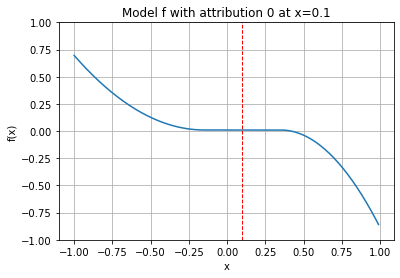

In [ ]:
# plot the model

xval = np.arange(-1, 1, 0.01)
yval = [model(x) for x in xval]

fig, ax = plt.subplots()
ax.set_ylim([-1, 1])
ax.plot(xval, yval)

plt.axvline(x = xbar, color = 'red', linestyle = 'dashed', linewidth=1)

ax.set(xlabel='x', ylabel='f(x)',
       title='Model f with attribution {} at x={}'.format(phi,xbar))
ax.grid()

In [ ]:
# incorporate the above code into a single function

def counterexample_model(funclist, delta, gamma, phi, xbar):

  intg, g, gprime = funclist

  # setup matrix to solve for coefficients

  #                       a                     , b                      , c             , alpha                  , beta
  coef_mat = np.matrix([[(xbar-delta)**3/3 + 1/3, (xbar-delta)**2/2 - 1/2, xbar-delta + 1, 1/3 - (xbar+delta)**3/3, 1/2 - (xbar+delta)**2/2], 
                        [(xbar-delta)**2        , xbar-delta             , 1             , 0                      , 0                      ],
                        [2*(xbar-delta)         , 1                      , 0             , 0                      , 0                      ],
                        [0                      , 0                      , 0             , (xbar+delta)**2        , xbar+delta             ],
                        [0                      , 0                      , 0             , 2*(xbar+delta)         , 1                      ]])

  b_vec = np.matrix([[2*g(xbar) - 2*phi - intg(xbar+delta) + intg(xbar-delta) + gamma*(xbar+delta-1)],
                    [g(xbar-delta)                                                                 ],
                    [gprime(xbar-delta)                                                            ],
                    [g(xbar+delta) - gamma                                                         ],
                    [gprime(xbar+delta)                                                            ]])

  param_vec = np.linalg.solve(coef_mat, b_vec)

  def model(x):
    if x >= -1 and x < (xbar-delta):
      return (param_vec[0]*(x**2) + param_vec[1]*x + param_vec[2]).item()
    elif x >= (xbar-delta) and x <= (xbar+delta):
      return g(x)
    elif x > (xbar+delta) and x <= 1:
      return (param_vec[3]*(x**2) + param_vec[4]*x + gamma).item()
    else:
      return 0

  return model


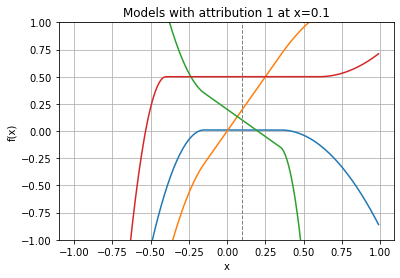

In [ ]:
# use the above code to plot functions

phi = 1
xbar = 0.1

intg, g, gprime, delta, gamma
plist1 = ([lambda x: 0.01*x, lambda x: 0.01, lambda x: 0], 0.25, -0.25)
plist2 = ([lambda x: x**2, lambda x: 2*x, lambda x: 2], 0.25, -0.25)
plist3 = ([lambda x: -(x-2*xbar)**2/2, lambda x: -(x-2*xbar), lambda x: -1], 0.25, -5)
plist4 = ([lambda x: 0.5*x, lambda x: 0.5, lambda x: 0], 0.5, 1)

# plist1 = ([lambda x: 0.01*x, lambda x: 0.01, lambda x: 0], 0.3, -0.3)
# plist2 = ([lambda x: x**2, lambda x: 2*x, lambda x: 2], 0.4, 0.5)
# plist3 = ([lambda x: -(x-2*xbar)**2/2, lambda x: -(x-2*xbar), lambda x: -1], 0.15, -1)
# plist4 = ([lambda x: 0.5*x, lambda x: 0.5, lambda x: 0], 0.7, 20)

# plist1 = ([lambda x: 0.01*x, lambda x: 0.01, lambda x: 0], xbar, -0.3)
# plist2 = ([lambda x: x**2, lambda x: 2*x, lambda x: 2], xbar, 0.5)
# plist3 = ([lambda x: -(x-2*xbar)**2/2, lambda x: -(x-2*xbar), lambda x: -1], xbar, -1)
# plist4 = ([lambda x: 0.5*x, lambda x: 0.5, lambda x: 0], xbar, 20)

fig, ax = plt.subplots()
ax.set_ylim([-1, 1])
for plist in [plist1, plist2, plist3, plist4]:
  flist, delta, gamma = plist
  model = counterexample_model(flist, delta, gamma, phi, xbar)
  yval = [model(x) for x in xval]
  ax.plot(xval, yval)

plt.axvline(x = xbar, color = 'gray', linestyle = 'dashed', linewidth=1)

ax.set(xlabel='x', ylabel='f(x)',
       title='Models with attribution {} at x={}'.format(phi,xbar))
ax.grid()

[Text(0.5, 0, 'Pr(True Positive)'),
 Text(0, 0.5, 'Pr(True Negative)'),
 Text(0.5, 1.0, 'Decision Making with Interpretability Methods')]

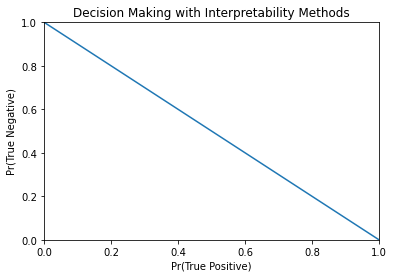

In [ ]:
# plot true positive vs true negative
fig, ax = plt.subplots()
ax.set_ylim([0, 1])
ax.set_xlim([0, 1])

xval = np.linspace(0,1,20)
yval = np.linspace(1,0,20)
ax.plot(xval,yval)

ax.set(xlabel='Pr(True Positive)', ylabel='Pr(True Negative)',
       title='Decision Making with Interpretability Methods')